In [1]:
import re
import pandas as pd

In [2]:
f=open('WhatsApp Chat with 20SW-1 Conversations.txt', 'r', encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)

18/12/2022, 6:52 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
18/12/2022, 6:52 pm - Aashir CR created group "20SW-1 (Odd Section)"
18/12/2022, 6:52 pm - Aashir CR added you
18/12/2022, 6:53 pm - Aashir CR changed the group name from "20SW-1 (Odd Section)" to "20SW Batch Section-1"
18/12/2022, 6:55 pm - Fiza joined using this group's invite link
18/12/2022, 6:55 pm - Hira joined using this group's invite link
18/12/2022, 6:56 pm - +92 333 2339895 joined using this group's invite link
18/12/2022, 6:56 pm - +92 332 3441794 joined using this group's invite link
18/12/2022, 6:56 pm - +92 323 2217672 joined using this group's invite link
18/12/2022, 6:56 pm - +92 331 3742843 joined using this group's invite link
18/12/2022, 6:56 pm - +92 322 9057739 joined using this group's invite link
18/12/2022, 6:56 pm - Dua Memon joined using this group's invite link
18/12/2022, 6:56 pm - +92 332 3498326 

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = r'\d{2}/\d{2}/\d{4}, \d{1,2}:\d{2}\s[ap]m\s-'

In [7]:
messages=re.split(pattern, data)[1:]

In [8]:
messages

[' Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 ' Aashir CR created group "20SW-1 (Odd Section)"\n',
 ' Aashir CR added you\n',
 ' Aashir CR changed the group name from "20SW-1 (Odd Section)" to "20SW Batch Section-1"\n',
 " Fiza joined using this group's invite link\n",
 " Hira joined using this group's invite link\n",
 " +92 333 2339895 joined using this group's invite link\n",
 " +92 332 3441794 joined using this group's invite link\n",
 " +92 323 2217672 joined using this group's invite link\n",
 " +92 331 3742843 joined using this group's invite link\n",
 " +92 322 9057739 joined using this group's invite link\n",
 " Dua Memon joined using this group's invite link\n",
 " +92 332 3498326 joined using this group's invite link\n",
 " Aashir CR changed this group's settings to allow only admins to send messages to this group\n",
 ' Aashir CR changed the settings so only admins can edit 

In [9]:
dates=re.findall(pattern, data)
dates

['18/12/2022, 6:52\u202fpm -',
 '18/12/2022, 6:52\u202fpm -',
 '18/12/2022, 6:52\u202fpm -',
 '18/12/2022, 6:53\u202fpm -',
 '18/12/2022, 6:55\u202fpm -',
 '18/12/2022, 6:55\u202fpm -',
 '18/12/2022, 6:56\u202fpm -',
 '18/12/2022, 6:56\u202fpm -',
 '18/12/2022, 6:56\u202fpm -',
 '18/12/2022, 6:56\u202fpm -',
 '18/12/2022, 6:56\u202fpm -',
 '18/12/2022, 6:56\u202fpm -',
 '18/12/2022, 6:56\u202fpm -',
 '18/12/2022, 6:57\u202fpm -',
 '18/12/2022, 6:57\u202fpm -',
 '18/12/2022, 6:57\u202fpm -',
 '18/12/2022, 6:58\u202fpm -',
 '18/12/2022, 6:59\u202fpm -',
 '18/12/2022, 7:01\u202fpm -',
 '18/12/2022, 7:02\u202fpm -',
 '18/12/2022, 7:02\u202fpm -',
 '18/12/2022, 7:02\u202fpm -',
 '18/12/2022, 7:03\u202fpm -',
 '18/12/2022, 7:03\u202fpm -',
 '18/12/2022, 7:03\u202fpm -',
 '18/12/2022, 7:04\u202fpm -',
 '18/12/2022, 7:05\u202fpm -',
 '18/12/2022, 7:07\u202fpm -',
 '18/12/2022, 7:08\u202fpm -',
 '18/12/2022, 7:08\u202fpm -',
 '18/12/2022, 7:13\u202fpm -',
 '18/12/2022, 7:15\u202fpm -',
 '18/12/

In [10]:
df=pd.DataFrame({'User_message':messages, 'Message_date':dates})
df['Message_date']=pd.to_datetime(df['Message_date'], format='%d/%m/%Y, %I:%M %p -')
df.rename(columns={'Message_date':'Date'},inplace=True)
df.head()

,User_message,Date
0,Messages and calls are end-to-end encrypted. ...,2022-12-18 18:52:00
1,"Aashir CR created group ""20SW-1 (Odd Section)""\n",2022-12-18 18:52:00
2,Aashir CR added you\n,2022-12-18 18:52:00
3,"Aashir CR changed the group name from ""20SW-1...",2022-12-18 18:53:00
4,Fiza joined using this group's invite link\n,2022-12-18 18:55:00


In [11]:
df.shape

(3258, 2)

In [12]:
users=[]
messages=[]
for message in df['User_message']:
    entry=re.split(r'([^:]+):\s' ,message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group notification')
        messages.append(entry[0])
df['Users']=users
df['Message']=messages
df.drop(columns=['User_message'],inplace=True)
df.tail()

,Date,Users,Message
3253,2024-08-02 14:29:00,+92 344 3714148,CodeAlpha chalega? XD\n
3254,2024-08-02 14:45:00,+92 323 2217672,Nftp bhi chal jayega bhai\n
3255,2024-08-02 14:47:00,+92 344 3714148,"Scene wohi hai yeh, they'll show these to bare..."
3256,2024-08-02 14:59:00,Aashir CR,<Media omitted>\n
3257,2024-08-02 15:02:00,Aashir CR,These students have received Merit Scholarship...


In [13]:
df['Message']=df['Message'].str.replace('<Media omitted>', '', regex=False)

In [14]:
df['Year']=df['Date'].dt.year

In [15]:
df['Month']=df['Date'].dt.month_name()

In [16]:
df['Day']=df['Date'].dt.day_name()

In [17]:
df['Hour']=df['Date'].dt.hour

In [18]:
df['Minute']=df['Date'].dt.minute

In [19]:
df.tail()

,Date,Users,Message,Year,Month,Day,Hour,Minute
3253,2024-08-02 14:29:00,+92 344 3714148,CodeAlpha chalega? XD\n,2024,August,Friday,14,29
3254,2024-08-02 14:45:00,+92 323 2217672,Nftp bhi chal jayega bhai\n,2024,August,Friday,14,45
3255,2024-08-02 14:47:00,+92 344 3714148,"Scene wohi hai yeh, they'll show these to bare...",2024,August,Friday,14,47
3256,2024-08-02 14:59:00,Aashir CR,\n,2024,August,Friday,14,59
3257,2024-08-02 15:02:00,Aashir CR,These students have received Merit Scholarship...,2024,August,Friday,15,2


In [20]:
words=[]
for message in df['Message']:
    words.extend(message.split())

In [21]:
len(words)

21624

In [22]:
df[df['Message']=='<Media omitted>/n'].shape[0]
print(df)

                    Date               Users  \
0    2022-12-18 18:52:00  group notification   
1    2022-12-18 18:52:00  group notification   
2    2022-12-18 18:52:00  group notification   
3    2022-12-18 18:53:00  group notification   
4    2022-12-18 18:55:00  group notification   
...                  ...                 ...   
3253 2024-08-02 14:29:00     +92 344 3714148   
3254 2024-08-02 14:45:00     +92 323 2217672   
3255 2024-08-02 14:47:00     +92 344 3714148   
3256 2024-08-02 14:59:00           Aashir CR   
3257 2024-08-02 15:02:00           Aashir CR   

                                                Message  Year     Month  \
0      Messages and calls are end-to-end encrypted. ...  2022  December   
1      Aashir CR created group "20SW-1 (Odd Section)"\n  2022  December   
2                                 Aashir CR added you\n  2022  December   
3      Aashir CR changed the group name from "20SW-1...  2022  December   
4          Fiza joined using this group's invite

In [23]:
!pip install urlextract

In [24]:
from urlextract import URLExtract
extractor=URLExtract()

In [25]:
links=[]
for message in df['Message']:
    links.extend(extractor.find_urls(message))

In [26]:
len(links)

166

In [27]:
df

,Date,Users,Message,Year,Month,Day,Hour,Minute
0,2022-12-18 18:52:00,group notification,Messages and calls are end-to-end encrypted. ...,2022,December,Sunday,18,52
1,2022-12-18 18:52:00,group notification,"Aashir CR created group ""20SW-1 (Odd Section)""\n",2022,December,Sunday,18,52
2,2022-12-18 18:52:00,group notification,Aashir CR added you\n,2022,December,Sunday,18,52
3,2022-12-18 18:53:00,group notification,"Aashir CR changed the group name from ""20SW-1...",2022,December,Sunday,18,53
4,2022-12-18 18:55:00,group notification,Fiza joined using this group's invite link\n,2022,December,Sunday,18,55
...,...,...,...,...,...,...,...,...
3253,2024-08-02 14:29:00,+92 344 3714148,CodeAlpha chalega? XD\n,2024,August,Friday,14,29
3254,2024-08-02 14:45:00,+92 323 2217672,Nftp bhi chal jayega bhai\n,2024,August,Friday,14,45
3255,2024-08-02 14:47:00,+92 344 3714148,"Scene wohi hai yeh, they'll show these to bare...",2024,August,Friday,14,47
3256,2024-08-02 14:59:00,Aashir CR,\n,2024,August,Friday,14,59


In [28]:
x=df['Users'].value_counts().head()

In [29]:
import matplotlib.pyplot as plt

In [30]:
name=x.index
count=x.values

In [31]:
name

Index([' Aashir CR', ' +92 347 5819210', ' +92 344 3714148',
       ' +92 332 3498326', ' +92 333 2339895'],
      dtype='object', name='Users')

In [32]:
count

array([829, 361, 249, 175, 166], dtype=int64)

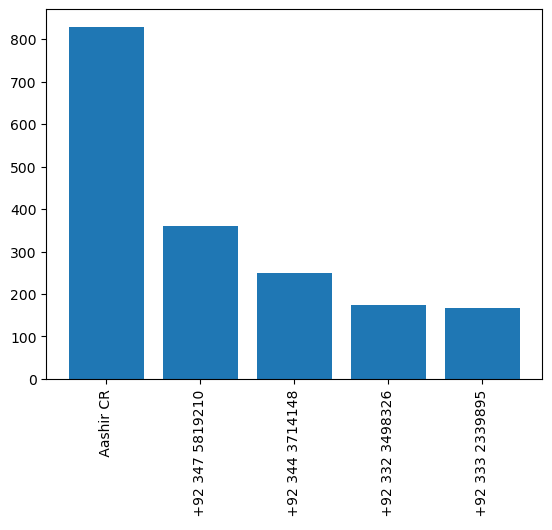

In [33]:
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
round((df['Users'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'count':'Percentage','Users':'Name' }).head()

,Name,Percentage
0,Aashir CR,25.45
1,+92 347 5819210,11.08
2,+92 344 3714148,7.64
3,+92 332 3498326,5.37
4,+92 333 2339895,5.10


In [35]:
#to remove group notification
temp=df[df['Users']!='group notification']
temp.head()

,Date,Users,Message,Year,Month,Day,Hour,Minute
18,2022-12-18 19:01:00,Aashir CR,\n,2022,December,Sunday,19,1
20,2022-12-18 19:02:00,Aashir CR,New timetable\n,2022,December,Sunday,19,2
44,2022-12-19 01:43:00,Aashir CR,\n,2022,December,Monday,1,43
45,2022-12-19 01:43:00,Aashir CR,\n,2022,December,Monday,1,43
48,2022-12-19 08:09:00,Aashir CR,*Please come in classroom no:4 for IS Class*\n,2022,December,Monday,8,9


In [36]:
f=open('stopwords.txt','r')
stop_words=f.read()
print(stop_words)

a
about
above
across
after
again
against
all
almost
alone
along
already
also
although
always
among
an
and
another
any
anybody
anyone
anything
anywhere
are
area
areas
around
as
ask
asked
asking
asks
at
away
b
back
backed
backing
backs
be
became
because
become
becomes
been
before
began
behind
being
beings
best
better
between
big
both
but
by
c
came
can
cannot
case
cases
certain
certainly
clear
clearly
come
could
d
did
differ
different
differently
do
does
done
down
down
downed
downing
downs
during
e
each
early
either
end
ended
ending
ends
enough
even
evenly
ever
every
everybody
everyone
everything
everywhere
f
face
faces
fact
facts
far
felt
few
find
finds
first
for
four
from
full
fully
further
furthered
furthering
furthers
g
gave
general
generally
get
gets
give
given
gives
go
going
good
goods
got
great
greater
greatest
group
grouped
grouping
groups
h
had
has
have
having
he
her
here
herself
high
high
high
higher
highest
him
himself
his
how
however
i
if
important
in
interest
interested
inter

In [37]:
#to remove stopwords
words=[]
for message in temp['Message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    words.extend(message.split())

In [38]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(25))

,0,1
0,to,384
1,the,338
2,message,305
3,birthday,270
4,and,253
5,deleted,250
6,class,215
7,sir,214
8,main,193
9,of,180


In [39]:
!pip install emoji

In [40]:
import emoji

emojis = []
for message in df['Message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

emojis=[]
for message in df['Message']:
emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [41]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,❤,135
1,😂,93
2,🥳,70
3,🎂,64
4,♥,61
...,...,...
113,😓,1
114,📢,1
115,🗓,1
116,🕗,1


In [42]:
df['Month_num']=df['Date'].dt.month

In [43]:
timeline=df.groupby(['Year','Month', 'Month_num']).count()['Message'].reset_index()
timeline

,Year,Month,Month_num,Message
0,2022,December,12,120
1,2023,April,4,360
2,2023,August,8,371
3,2023,December,12,120
4,2023,February,2,430
5,2023,January,1,207
6,2023,July,7,105
7,2023,June,6,99
8,2023,March,3,285
9,2023,May,5,172


In [44]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i]+'-'+str(timeline['Year'][i]))
time

['December-2022',
 'April-2023',
 'August-2023',
 'December-2023',
 'February-2023',
 'January-2023',
 'July-2023',
 'June-2023',
 'March-2023',
 'May-2023',
 'November-2023',
 'October-2023',
 'September-2023',
 'April-2024',
 'August-2024',
 'February-2024',
 'January-2024',
 'July-2024',
 'June-2024',
 'March-2024',
 'May-2024']

In [45]:
timeline['Time']=time
timeline

,Year,Month,Month_num,Message,Time
0,2022,December,12,120,December-2022
1,2023,April,4,360,April-2023
2,2023,August,8,371,August-2023
3,2023,December,12,120,December-2023
4,2023,February,2,430,February-2023
5,2023,January,1,207,January-2023
6,2023,July,7,105,July-2023
7,2023,June,6,99,June-2023
8,2023,March,3,285,March-2023
9,2023,May,5,172,May-2023


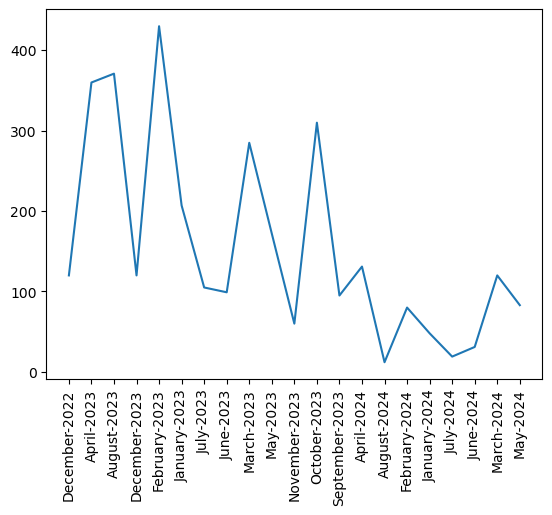

In [46]:
plt.plot(timeline['Time'], timeline['Message'])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
df

,Date,Users,Message,Year,Month,Day,Hour,Minute,Month_num
0,2022-12-18 18:52:00,group notification,Messages and calls are end-to-end encrypted. ...,2022,December,Sunday,18,52,12
1,2022-12-18 18:52:00,group notification,"Aashir CR created group ""20SW-1 (Odd Section)""\n",2022,December,Sunday,18,52,12
2,2022-12-18 18:52:00,group notification,Aashir CR added you\n,2022,December,Sunday,18,52,12
3,2022-12-18 18:53:00,group notification,"Aashir CR changed the group name from ""20SW-1...",2022,December,Sunday,18,53,12
4,2022-12-18 18:55:00,group notification,Fiza joined using this group's invite link\n,2022,December,Sunday,18,55,12
...,...,...,...,...,...,...,...,...,...
3253,2024-08-02 14:29:00,+92 344 3714148,CodeAlpha chalega? XD\n,2024,August,Friday,14,29,8
3254,2024-08-02 14:45:00,+92 323 2217672,Nftp bhi chal jayega bhai\n,2024,August,Friday,14,45,8
3255,2024-08-02 14:47:00,+92 344 3714148,"Scene wohi hai yeh, they'll show these to bare...",2024,August,Friday,14,47,8
3256,2024-08-02 14:59:00,Aashir CR,\n,2024,August,Friday,14,59,8


In [48]:
df['Only_date']=df['Date'].dt.date
df['Only_date']

0       2022-12-18
1       2022-12-18
2       2022-12-18
3       2022-12-18
4       2022-12-18
           ...    
3253    2024-08-02
3254    2024-08-02
3255    2024-08-02
3256    2024-08-02
3257    2024-08-02
Name: Only_date, Length: 3258, dtype: object

In [49]:
daily_timeline=df.groupby('Only_date').count()['Message'].reset_index()
daily_timeline

,Only_date,Message
0,2022-12-18,44
1,2022-12-19,27
2,2022-12-20,37
3,2022-12-21,6
4,2022-12-22,1
...,...,...
375,2024-07-21,1
376,2024-07-25,1
377,2024-07-28,3
378,2024-08-01,5


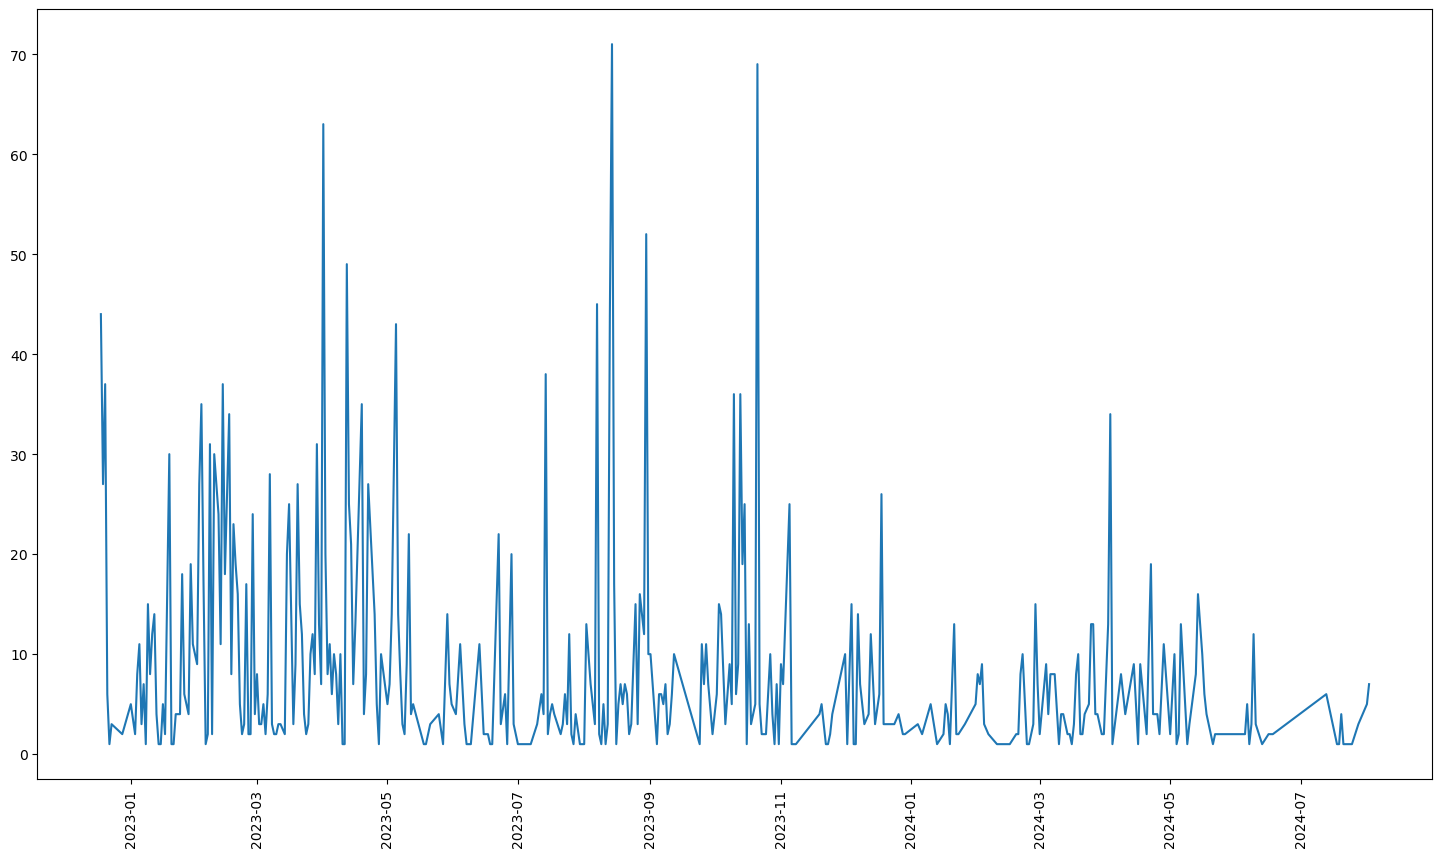

In [50]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['Only_date'], daily_timeline['Message'])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
df

,Date,Users,Message,Year,Month,Day,Hour,Minute,Month_num,Only_date
0,2022-12-18 18:52:00,group notification,Messages and calls are end-to-end encrypted. ...,2022,December,Sunday,18,52,12,2022-12-18
1,2022-12-18 18:52:00,group notification,"Aashir CR created group ""20SW-1 (Odd Section)""\n",2022,December,Sunday,18,52,12,2022-12-18
2,2022-12-18 18:52:00,group notification,Aashir CR added you\n,2022,December,Sunday,18,52,12,2022-12-18
3,2022-12-18 18:53:00,group notification,"Aashir CR changed the group name from ""20SW-1...",2022,December,Sunday,18,53,12,2022-12-18
4,2022-12-18 18:55:00,group notification,Fiza joined using this group's invite link\n,2022,December,Sunday,18,55,12,2022-12-18
...,...,...,...,...,...,...,...,...,...,...
3253,2024-08-02 14:29:00,+92 344 3714148,CodeAlpha chalega? XD\n,2024,August,Friday,14,29,8,2024-08-02
3254,2024-08-02 14:45:00,+92 323 2217672,Nftp bhi chal jayega bhai\n,2024,August,Friday,14,45,8,2024-08-02
3255,2024-08-02 14:47:00,+92 344 3714148,"Scene wohi hai yeh, they'll show these to bare...",2024,August,Friday,14,47,8,2024-08-02
3256,2024-08-02 14:59:00,Aashir CR,\n,2024,August,Friday,14,59,8,2024-08-02


In [52]:
df['Day_name']=df['Date'].dt.day_name()
df['Day_name']

0       Sunday
1       Sunday
2       Sunday
3       Sunday
4       Sunday
         ...  
3253    Friday
3254    Friday
3255    Friday
3256    Friday
3257    Friday
Name: Day_name, Length: 3258, dtype: object

In [53]:
df['Day_name'].value_counts()

Day_name
Monday       546
Wednesday    532
Tuesday      464
Friday       462
Sunday       443
Thursday     441
Saturday     370
Name: count, dtype: int64

In [54]:
df.head()

,Date,Users,Message,Year,Month,Day,Hour,Minute,Month_num,Only_date,Day_name
0,2022-12-18 18:52:00,group notification,Messages and calls are end-to-end encrypted. ...,2022,December,Sunday,18,52,12,2022-12-18,Sunday
1,2022-12-18 18:52:00,group notification,"Aashir CR created group ""20SW-1 (Odd Section)""\n",2022,December,Sunday,18,52,12,2022-12-18,Sunday
2,2022-12-18 18:52:00,group notification,Aashir CR added you\n,2022,December,Sunday,18,52,12,2022-12-18,Sunday
3,2022-12-18 18:53:00,group notification,"Aashir CR changed the group name from ""20SW-1...",2022,December,Sunday,18,53,12,2022-12-18,Sunday
4,2022-12-18 18:55:00,group notification,Fiza joined using this group's invite link\n,2022,December,Sunday,18,55,12,2022-12-18,Sunday


In [55]:
period=[]
for hour in df[['Day_name', 'Hour']]['Hour']:
    if hour==23:
        period.append(str(hour)+"-"+str('00'))
    elif hour==0:
        period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

In [56]:
df['Period']=period

In [57]:
df.head()

,Date,Users,Message,Year,Month,Day,Hour,Minute,Month_num,Only_date,Day_name,Period
0,2022-12-18 18:52:00,group notification,Messages and calls are end-to-end encrypted. ...,2022,December,Sunday,18,52,12,2022-12-18,Sunday,18-19
1,2022-12-18 18:52:00,group notification,"Aashir CR created group ""20SW-1 (Odd Section)""\n",2022,December,Sunday,18,52,12,2022-12-18,Sunday,18-19
2,2022-12-18 18:52:00,group notification,Aashir CR added you\n,2022,December,Sunday,18,52,12,2022-12-18,Sunday,18-19
3,2022-12-18 18:53:00,group notification,"Aashir CR changed the group name from ""20SW-1...",2022,December,Sunday,18,53,12,2022-12-18,Sunday,18-19
4,2022-12-18 18:55:00,group notification,Fiza joined using this group's invite link\n,2022,December,Sunday,18,55,12,2022-12-18,Sunday,18-19


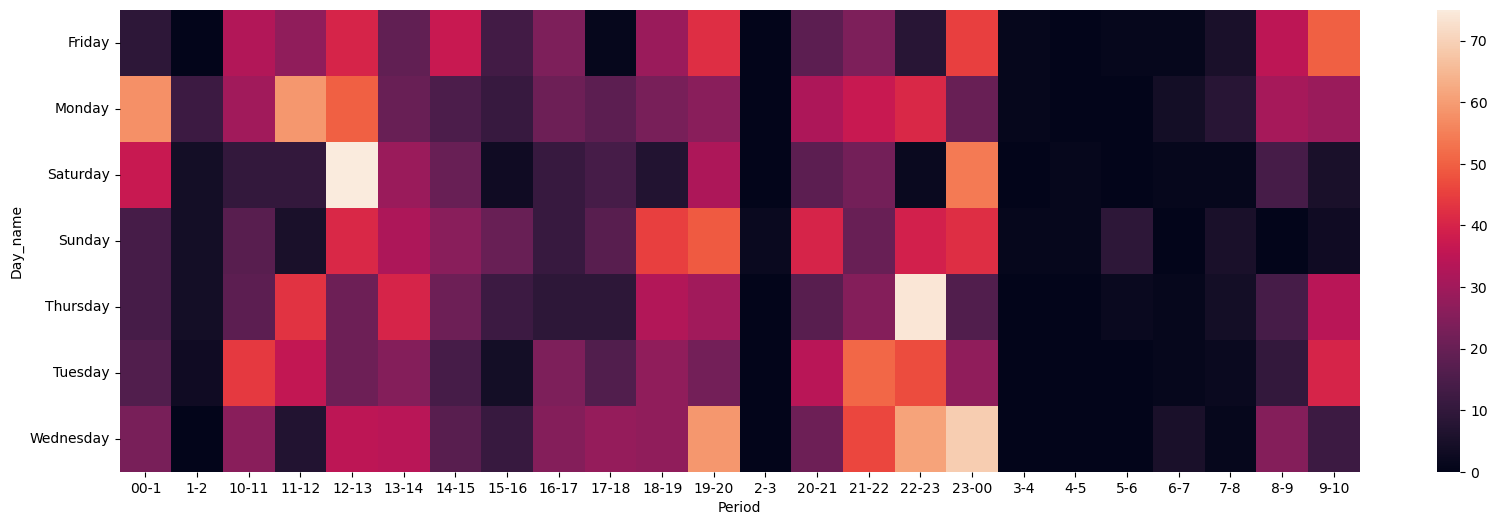

In [58]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='Day_name', columns='Period', values='Message',aggfunc='count').fillna(0))
plt.xticks(rotation='horizontal')
plt.show()

In [59]:
df.pivot_table(index='Day_name', columns='Period', values='Message',aggfunc='count').fillna(0)

Period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
Day_name,,,,,,,,,,,,,,,,,,,,,
Friday,9.0,0.0,33.0,27.0,40.0,19.0,37.0,13.0,24.0,1.0,...,24.0,8.0,45.0,1.0,0.0,1.0,1.0,5.0,35.0,50.0
Monday,58.0,12.0,30.0,59.0,50.0,20.0,15.0,11.0,21.0,18.0,...,37.0,41.0,20.0,1.0,0.0,0.0,4.0,8.0,31.0,29.0
Saturday,37.0,4.0,10.0,10.0,75.0,29.0,20.0,3.0,11.0,14.0,...,22.0,2.0,54.0,0.0,1.0,0.0,1.0,1.0,14.0,5.0
Sunday,14.0,4.0,17.0,5.0,41.0,32.0,26.0,20.0,11.0,17.0,...,20.0,39.0,42.0,1.0,1.0,9.0,0.0,5.0,0.0,3.0
Thursday,14.0,4.0,18.0,43.0,21.0,40.0,21.0,12.0,9.0,9.0,...,25.0,74.0,16.0,0.0,0.0,2.0,1.0,4.0,14.0,34.0
Tuesday,16.0,3.0,44.0,36.0,21.0,25.0,14.0,4.0,24.0,16.0,...,51.0,47.0,27.0,0.0,0.0,0.0,1.0,2.0,10.0,40.0
Wednesday,23.0,0.0,26.0,7.0,35.0,34.0,17.0,11.0,25.0,28.0,...,46.0,61.0,69.0,0.0,0.0,0.0,5.0,1.0,25.0,12.0


NameError: name 'helper' is not defined